In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("safe_night_travel_dummy_data.csv")
df

,Time,Gender,LocationFamiliarity,ModeOfTransport,PresenceOfCompanions,PhoneBatteryLevel,PreviousIncidentArea,SafeToTravel
0,14,Other,yes,4-wheeler,no,12,yes,no
1,16,M,yes,walk,no,49,no,yes
2,21,M,yes,4-wheeler,yes,81,yes,yes
3,15,F,no,2-wheeler,yes,60,yes,yes
4,15,F,yes,walk,yes,76,yes,yes
...,...,...,...,...,...,...,...,...
195,6,F,yes,4-wheeler,no,43,yes,yes
196,3,Other,no,auto,yes,100,yes,no
197,7,F,no,2-wheeler,yes,31,yes,yes
198,21,F,yes,walk,yes,24,no,yes


In [29]:
# Explore the dataset structure
print("Dataset shape:", df.shape)
print("\nColumn names and data types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}: {df[col].unique()}")

Dataset shape: (200, 8)

Column names and data types:
Time                     int64
Gender                  object
LocationFamiliarity     object
ModeOfTransport         object
PresenceOfCompanions    object
PhoneBatteryLevel        int64
PreviousIncidentArea    object
SafeToTravel            object
dtype: object

First few rows:
   Time Gender LocationFamiliarity ModeOfTransport PresenceOfCompanions  \
0    14  Other                 yes       4-wheeler                   no   
1    16      M                 yes            walk                   no   
2    21      M                 yes       4-wheeler                  yes   
3    15      F                  no       2-wheeler                  yes   
4    15      F                 yes            walk                  yes   

   PhoneBatteryLevel PreviousIncidentArea SafeToTravel  
0                 12                  yes           no  
1                 49                   no          yes  
2                 81                  yes    

In [30]:
# Import additional libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [31]:
# Feature Encoding
# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Binary categorical features (yes/no) - convert to 0/1
binary_features = ['LocationFamiliarity', 'PresenceOfCompanions', 'PreviousIncidentArea']
for feature in binary_features:
    df_encoded[feature] = df_encoded[feature].map({'yes': 1, 'no': 0})

# Target variable encoding
df_encoded['SafeToTravel'] = df_encoded['SafeToTravel'].map({'yes': 1, 'no': 0})

# Nominal categorical features - use one-hot encoding
nominal_features = ['Gender', 'ModeOfTransport']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features, drop_first=False)

print("Encoded dataset shape:", df_encoded.shape)
print("\nEncoded columns:")
print(df_encoded.columns.tolist())
print("\nFirst few rows of encoded data:")
df_encoded.head()

Encoded dataset shape: (200, 13)

Encoded columns:
['Time', 'LocationFamiliarity', 'PresenceOfCompanions', 'PhoneBatteryLevel', 'PreviousIncidentArea', 'SafeToTravel', 'Gender_F', 'Gender_M', 'Gender_Other', 'ModeOfTransport_2-wheeler', 'ModeOfTransport_4-wheeler', 'ModeOfTransport_auto', 'ModeOfTransport_walk']

First few rows of encoded data:


Encoded dataset shape: (200, 13)

Encoded columns:
['Time', 'LocationFamiliarity', 'PresenceOfCompanions', 'PhoneBatteryLevel', 'PreviousIncidentArea', 'SafeToTravel', 'Gender_F', 'Gender_M', 'Gender_Other', 'ModeOfTransport_2-wheeler', 'ModeOfTransport_4-wheeler', 'ModeOfTransport_auto', 'ModeOfTransport_walk']

First few rows of encoded data:


,Time,LocationFamiliarity,PresenceOfCompanions,PhoneBatteryLevel,PreviousIncidentArea,SafeToTravel,Gender_F,Gender_M,Gender_Other,ModeOfTransport_2-wheeler,ModeOfTransport_4-wheeler,ModeOfTransport_auto,ModeOfTransport_walk
0,14,1,0,12,1,0,False,False,True,False,True,False,False
1,16,1,0,49,0,1,False,True,False,False,False,False,True
2,21,1,1,81,1,1,False,True,False,False,True,False,False
3,15,0,1,60,1,1,True,False,False,True,False,False,False
4,15,1,1,76,1,1,True,False,False,False,False,False,True


In [32]:
# Prepare features and target variable
# Separate features (X) and target variable (y)
X = df_encoded.drop('SafeToTravel', axis=1)
y = df_encoded['SafeToTravel']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())
print("\nTarget variable distribution:")
print(y.value_counts())

Features (X) shape: (200, 12)
Target (y) shape: (200,)

Feature columns:
['Time', 'LocationFamiliarity', 'PresenceOfCompanions', 'PhoneBatteryLevel', 'PreviousIncidentArea', 'Gender_F', 'Gender_M', 'Gender_Other', 'ModeOfTransport_2-wheeler', 'ModeOfTransport_4-wheeler', 'ModeOfTransport_auto', 'ModeOfTransport_walk']

Target variable distribution:
SafeToTravel
1    131
0     69
Name: count, dtype: int64


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% for testing
    random_state=42,   # For reproducible results
    stratify=y         # Maintain same proportion of target classes
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTraining target distribution:")
print(y_train.value_counts())
print("\nTesting target distribution:")
print(y_test.value_counts())

Training set size: 160
Testing set size: 40

Training target distribution:
SafeToTravel
1    105
0     55
Name: count, dtype: int64

Testing target distribution:
SafeToTravel
1    26
0    14
Name: count, dtype: int64


In [34]:
# Train the Logistic Regression Model
# Create and train the model with regularization to handle multicollinearity
model = LogisticRegression(random_state=42, max_iter=1000, C=1.0, penalty='l2')
model.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully!")
print(f"Model coefficients shape: {model.coef_.shape}")
print(f"Model intercept: {model.intercept_[0]:.4f}")

# Display feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Coefficients (sorted by importance):")
print(feature_importance)

✅ Logistic Regression model trained successfully!
Model coefficients shape: (1, 12)
Model intercept: -1.2226

Feature Coefficients (sorted by importance):
                      Feature  Coefficient  Abs_Coefficient
2        PresenceOfCompanions     1.320387         1.320387
5                    Gender_F     0.483120         0.483120
4        PreviousIncidentArea    -0.387904         0.387904
9   ModeOfTransport_4-wheeler     0.365661         0.365661
7                Gender_Other    -0.351082         0.351082
11       ModeOfTransport_walk    -0.325369         0.325369
6                    Gender_M    -0.132057         0.132057
1         LocationFamiliarity    -0.123526         0.123526
8   ModeOfTransport_2-wheeler    -0.091008         0.091008
10       ModeOfTransport_auto     0.050698         0.050698
3           PhoneBatteryLevel     0.025972         0.025972
0                        Time     0.005353         0.005353


🎯 Model Accuracy: 0.6500 (65.00%)

📊 Classification Report:
              precision    recall  f1-score   support

    Not Safe       0.50      0.50      0.50        14
        Safe       0.73      0.73      0.73        26

    accuracy                           0.65        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.65      0.65      0.65        40


🔍 Confusion Matrix:
[[ 7  7]
 [ 7 19]]


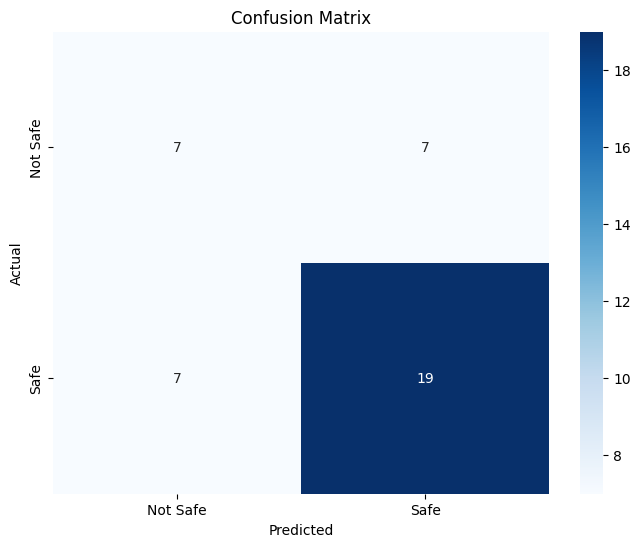

In [39]:
# Make Predictions and Evaluate Model
# Make predictions on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Safe', 'Safe']))

# Confusion Matrix
print("\n🔍 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Safe', 'Safe'], 
            yticklabels=['Not Safe', 'Safe'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()